In [500]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from wordcloud import WordCloud
from PIL import Image
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
df = pd.read_csv('웅이네오돌뼈닭발도_전처리.csv', sep = ',')

In [3]:
df.dropna(inplace = True)

In [4]:
df['label'] = [1 if x > 3 else 0 for x in df['star']]

In [474]:
target = df['review_spell_check'].str.split(' ').sum(axis = 0)

### WordCloud

In [510]:
wc = WordCloud(font_path = 'AppleGothic', colormap = 'Accent_r', background_color = 'white').generate_from_frequencies(dict(Counter(target).most_common(150)[1:]))

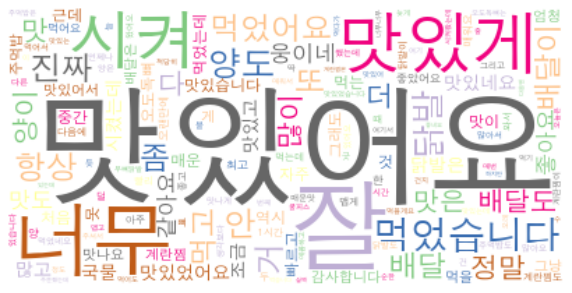

In [511]:
plt.figure(figsize = (10, 6))

plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

### Getting Stopwords

In [219]:
# 기본 불용어
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords = [x[0] for x in stopwords]

In [423]:
stopwords += ['할지', '걸로', '텐데', '건데', '는데', '다는', '어요', '다고', '걸렸', '건지', '사항', '네요', '정도', '입니다', '원래', '예요', '봤', '줄', '알', '거', '드', '분', '쿨', '게', '같', '인데', '컷', '해', '제대로', '해서', '와서', '오늘']

### Import Mecab

In [424]:
from konlpy.tag import Mecab

In [425]:
mecab = Mecab()

### Preprocessing

In [426]:
import re

In [427]:
mecab_pos = []

for text in df['review_spell_check'] :
    m_p = mecab.pos(text)
    clean_text = []
    for t in m_p :
        if (t[1].startswith('V') or t[1].startswith('N') or t[1].startswith('M')) and (t[0] not in stopwords) : 
            clean_text += [t[0]]
            
        else :
            pass
        
    mecab_pos.append(re.sub(r'[^가-힣]', ' ', str(clean_text)))

### Import TfidfVectorizer

In [428]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [518]:
tfidf = TfidfVectorizer(max_features = 200, lowercase = False)

### Modeling

In [519]:
df['token'] = mecab_pos

In [520]:
X = df['token']
y = df['label']

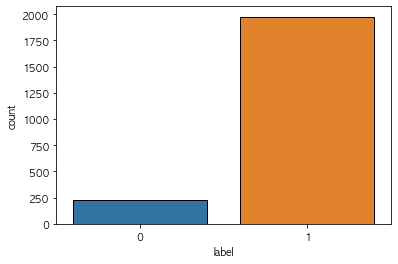

In [521]:
sns.countplot(y, edgecolor = (0, 0, 0))
plt.show()

### Split Data

In [522]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, stratify = y, random_state = 1)

In [523]:
tr_X = tfidf.fit_transform(X_train).toarray()

In [524]:
te_X = tfidf.transform(X_test).toarray()

### Tf-idf Matrix

In [525]:
tr_df = pd.DataFrame(tr_X, columns = tfidf.get_feature_names())
tr_df.head()

,가격,가끔,가루,가져다주,가족,감사,강추,개인,걸리,걸린,...,친절,콩나물,쿠폰,특히,포장,피스,필요,합니다,항상,후기
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.257511,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [526]:
te_df = pd.DataFrame(te_X, columns = tfidf.get_feature_names())
te_df.head()

,가격,가끔,가루,가져다주,가족,감사,강추,개인,걸리,걸린,...,친절,콩나물,쿠폰,특히,포장,피스,필요,합니다,항상,후기
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.767828,0.0


### Visualizing Word Count

In [529]:
word_cnt = pd.DataFrame({'단어' : tfidf.get_feature_names(), '빈도' : tr_X.sum(axis = 0)}).sort_values(by = '빈도')[::-1][:20]

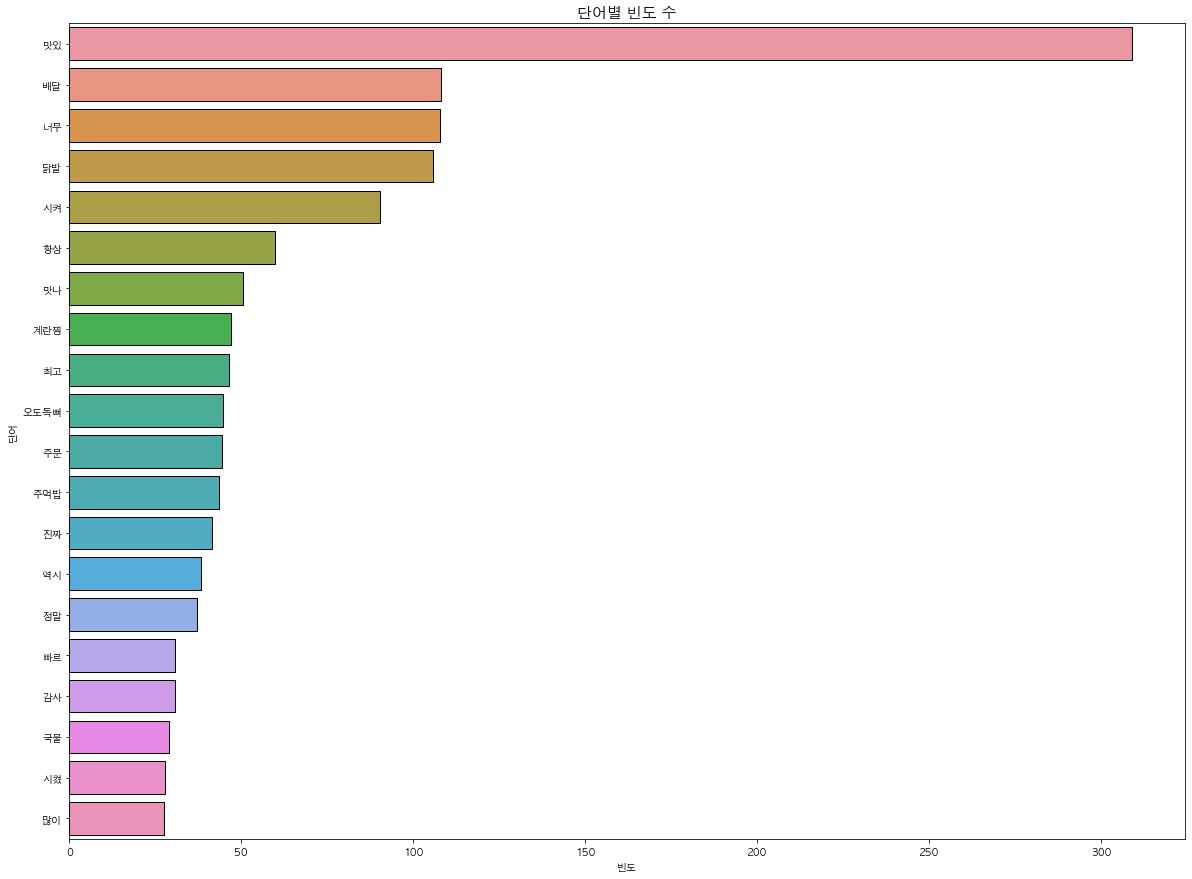

In [530]:
plt.figure(figsize = (20, 15))
plt.title('단어별 빈도 수', size = 15)
sns.barplot(y = word_cnt.단어, x = word_cnt.빈도, edgecolor = (0, 0, 0))
plt.show()

### Positive or Negative Key Words - Based Tfidf & LSA - Topic Modeling

In [440]:
from sklearn.decomposition import TruncatedSVD

In [441]:
def get_topic_modeling(data) :
    svd = TruncatedSVD(n_components = 5, random_state = 1) # 5개 주제 출력
    svd_fit = svd.fit(data)
    doc_emb = svd.transform(data)
    loading = pd.DataFrame(svd.components_.T)
    loading['word'] = tfidf.get_feature_names()
    
    def get_topics(components, feature_names, n = 10):
        for idx, topic in enumerate(components):
            print("Topic %d: \n" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
            print('\n')
    return get_topics(svd_fit.components_, loading['word'])

In [442]:
pos_text = df[df.label == 1]
neg_text = df[df.label == 0]

#### Positive

In [443]:
tfidf = TfidfVectorizer(max_features = 200, lowercase = False)

In [444]:
pos_tfidf = tfidf.fit_transform(pos_text['token']).toarray()

In [445]:
pos_df = pd.DataFrame({'단어' : tfidf.get_feature_names(), '빈도' : pos_tfidf.sum(axis = 0)})

In [446]:
pos_top5 = pos_df.sort_values(by = '빈도')[-5:][::-1]

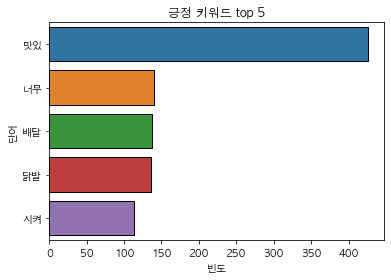

In [447]:
plt.title('긍정 키워드 top 5')
sns.barplot(pos_top5['빈도'], pos_top5['단어'], edgecolor = (0, 0, 0))
plt.show()

In [448]:
get_topic_modeling(pos_tfidf)

Topic 1: 
 [('맛있', 0.94426), ('너무', 0.18507), ('닭발', 0.1191), ('시켜', 0.11453), ('배달', 0.10898), ('항상', 0.08424), ('계란찜', 0.05635), ('주먹밥', 0.05573), ('주문', 0.05035), ('오도독뼈', 0.04381)]


Topic 2: 
 [('너무', 0.47437), ('배달', 0.4598), ('닭발', 0.42312), ('시켜', 0.30749), ('빠르', 0.15444), ('항상', 0.1528), ('맛나', 0.14521), ('최고', 0.10345), ('계란찜', 0.10129), ('주문', 0.09931)]


Topic 3: 
 [('시켜', 0.45311), ('닭발', 0.44318), ('항상', 0.24189), ('최고', 0.10043), ('맛나', 0.09191), ('국물', 0.08309), ('역시', 0.07817), ('오도독뼈', 0.07433), ('주먹밥', 0.06577), ('계란찜', 0.06548)]


Topic 4: 
 [('너무', 0.76512), ('계란찜', 0.041), ('매웠', 0.02199), ('국물', 0.01931), ('주먹밥', 0.01915), ('매워서', 0.01603), ('오랜만', 0.01322), ('사진', 0.0132), ('피스', 0.00802), ('특히', 0.00754)]


Topic 5: 
 [('시켜', 0.58826), ('항상', 0.38316), ('너무', 0.23092), ('자주', 0.0748), ('오랜만', 0.02665), ('만족', 0.02136), ('가끔', 0.01629), ('요기', 0.00909), ('주일', 0.00788), ('요양', 0.00568)]




#### Negative

In [449]:
neg_tfidf = tfidf.fit_transform(neg_text['token']).toarray()

In [450]:
neg_df = pd.DataFrame({'단어' : tfidf.get_feature_names(), '빈도' : neg_tfidf.sum(axis = 0)})

In [451]:
neg_top5 = neg_df.sort_values(by = '빈도')[-5:][::-1]

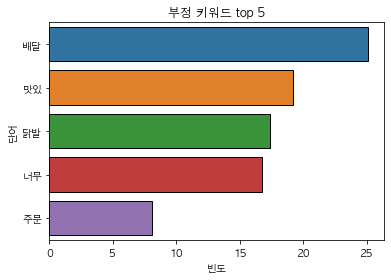

In [452]:
plt.title('부정 키워드 top 5')
sns.barplot(neg_top5['빈도'], neg_top5['단어'], edgecolor = (0, 0, 0))
plt.show()

In [453]:
get_topic_modeling(neg_tfidf)

Topic 1: 
 [('배달', 0.60579), ('맛있', 0.40588), ('닭발', 0.35142), ('너무', 0.34725), ('주문', 0.14798), ('시켜', 0.12423), ('느려요', 0.12377), ('시켰', 0.09792), ('주먹밥', 0.09217), ('진짜', 0.08933)]


Topic 2: 
 [('맛있', 0.49244), ('닭발', 0.46526), ('시켜', 0.16655), ('주먹밥', 0.13627), ('계란찜', 0.11454), ('국물', 0.10749), ('떡볶이', 0.06368), ('오도독뼈', 0.05973), ('진짜', 0.05762), ('정말', 0.05524)]


Topic 3: 
 [('맛있', 0.6268), ('배달', 0.17008), ('정말', 0.08869), ('음식', 0.07186), ('시켜', 0.06924), ('아쉬웠', 0.06227), ('오래', 0.0498), ('옵니다', 0.0458), ('리뷰', 0.03767), ('걸려요', 0.0353)]


Topic 4: 
 [('너무', 0.67134), ('매워', 0.24684), ('시켜', 0.1877), ('자주', 0.16146), ('맛있', 0.15626), ('괜찮', 0.10922), ('느려요', 0.10526), ('많이', 0.08503), ('오래', 0.07259), ('주먹밥', 0.07161)]


Topic 5: 
 [('매워', 0.53656), ('주꾸미', 0.32787), ('그냥', 0.32711), ('주먹밥', 0.21107), ('아주', 0.19511), ('진짜', 0.14628), ('시켰', 0.12475), ('국물', 0.11545), ('양념', 0.10122), ('계란찜', 0.08734)]




### Make Custom Function For Modeling

In [454]:
def get_score_cfm(model) :
    model.fit(tr_X, y_train)
    
    pred = model.predict(te_X)
    
    print(f'Model : {model.__class__.__name__}\n')
    print('accuracy: %.2f' % accuracy_score(y_test, pred))
    print('precision: %.2f' % precision_score(y_test, pred))
    print('recall: %.2f' % recall_score(y_test, pred))
    print('F1: %.2f\n' % f1_score(y_test, pred))
    
    cfm = confusion_matrix(y_test, pred)
    plt.title('Confusion Matrix')
    sns.heatmap(cfm, annot = True, fmt='.10g')
    plt.show() 
    
    print(f'정답 수 : {cfm[0,0] + cfm[1,1]} / 오답 수 : {cfm[0,1] + cfm[1,0]}')

### 1. LogisticRegression

In [455]:
from sklearn.linear_model import LogisticRegression

In [456]:
lr = LogisticRegression(random_state = 0)

Model : LogisticRegression

accuracy: 0.90
precision: 0.90
recall: 1.00
F1: 0.95



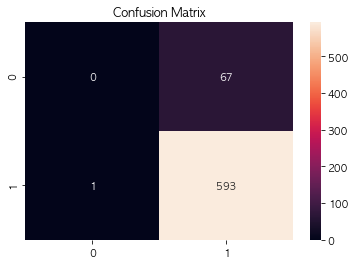

정답 수 : 593 / 오답 수 : 68


In [457]:
get_score_cfm(lr)

### Positive or Negative Key Words - Based LogisticRegression

In [458]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = False)

In [459]:
invert_index_vectorizer = {v: k for k, v in tfidf.vocabulary_.items()}

In [460]:
# 긍정 키워드 10개
for coef in coef_pos_index[:10]:
    print(invert_index_vectorizer[coef[1]], coef[0]) 

매워 2.956236768751076
출발 1.5252563805659052
빨리 1.4225458472875103
감자튀김 1.262177308424301
매운 1.217511260545025
예정 1.068219951701028
여긴 0.8933231231512134
요양 0.7931286945898418
상태 0.7718391221659885
콩나물국 0.7350183750907886


In [461]:
# 부정 키워드 10개
for coef in coef_neg_index[:10]:
    print(invert_index_vectorizer[coef[1]], coef[0])

주문 -2.0245316604131065
리뷰 -2.0089933005957548
근데 -1.782465848027255
짬뽕 -1.7813147285091797
아주 -1.7801835490590203
그거 -1.6633987623127777
보통 -1.6580376204198943
드립니다 -1.558700392575688
빨랐 -1.5180452160195903
누룽지 -1.4298278146205168


### 2. BERT

In [7]:
from bert_sklearn import BertClassifier

In [8]:
model = BertClassifier(bert_model="bert-base-multilingual-uncased", epochs = 5, learning_rate = 5e-3, validation_fraction = 0)

Building sklearn text classifier...


In [9]:
X_train, X_test, y_train, y_test = train_test_split(df['review_spell_check'], df['label'], test_size = .3, stratify = df['label'], random_state = 1)

In [10]:
model.fit(X_train, y_train)

Loading bert-base-multilingual-uncased model...
Defaulting to linear classifier/regressor
Loading Pytorch checkpoint

train data size: 1540, validation data size: 0



Training  :   0%|          | 0/49 [00:00<?, ?it/s]

Training  :   0%|          | 0/49 [00:00<?, ?it/s]

Training  :   0%|          | 0/49 [00:00<?, ?it/s]

Training  :   0%|          | 0/49 [00:00<?, ?it/s]

Training  :   0%|          | 0/49 [00:00<?, ?it/s]

BertClassifier(bert_config_json=None,
               bert_model='bert-base-multilingual-uncased', bert_vocab=None,
               do_lower_case=True, epochs=5, eval_batch_size=8, fp16=False,
               from_tf=False, gradient_accumulation_steps=1, ignore_label=None,
               label_list=array([0, 1]), learning_rate=0.005, local_rank=-1,
               logfile='bert_sklearn.log', loss_scale=0, max_seq_length=128,
               num_mlp_hiddens=500, num_mlp_layers=0, random_state=42,
               restore_file=None, train_batch_size=32, use_cuda=True,
               validation_fraction=0, warmup_proportion=0.1)

In [11]:
pred = model.predict(X_test)

Predicting:   0%|          | 0/83 [00:00<?, ?it/s]

In [24]:
print('accuracy: %.2f' % accuracy_score(y_test, pred))
print('precision: %.2f' % precision_score(y_test, pred))
print('recall: %.2f' % recall_score(y_test, pred))
print('F1: %.2f\n' % f1_score(y_test, pred))

accuracy: 0.90
precision: 0.90
recall: 1.00
F1: 0.95

